<a href="https://colab.research.google.com/github/yohanesnuwara/reportminer/blob/main/ReportMiner_Multiple_PDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ReportMiner

Using ReportMiner on Google Colab. ReportMiner is an easy-to-use wrapper for multimodal retrieval augmented generation (RAG) tasks for technical reports.

Here we will use ColPali-1.2 as our embedding model and SmolVLM as our visual language model to perform RAG on multiple reports, not just one report. Note you need a High-Memory RAM option on Colab Pro and GPU T4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (121 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123632 

In [3]:
!pip install ReportMiner


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from reportminer import rag, rag_folder

Here, we upload a folder that consists of multiple reports spread inside sub folders. The use of `find_all_pdfs` is to collect all these reports and put it inside a directory

In [2]:
# Specify folder that contain pdf
root_directory = '/content/drive/MyDrive/All wells data logs and reports'

In [10]:
help(rag_folder.find_all_pdfs)

Help on function find_all_pdfs in module reportminer.rag_folder:

find_all_pdfs(root_directory, data_directory='./data')
    Collect all PDF reports in a folder
    The PDFs must be structured in a way like this:
    
    root_directory
    |_ sub directory 1
        |_ pdf 1
        |_ sub sub directory
            |_ pdf 2
    |_ sub directory 2
        |_ sub sub directory
            |_ pdf 3
            |_ pdf ...
    |_ ...
    
    It will collect all PDFs and order them into each of its sub directories
    
    Args:
    
    root_directory (str): The path of root directory
    data_directory (str): The path of data directory that is ordered by subdirectory. Default is './data'



In [3]:
# Move only reports from root to data directory
rag_folder.find_all_pdfs(root_directory)


Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/Poseidon 2_Encl 1_comp_log.pdf -> ./data/poseidon 2/Poseidon 2_Encl 1_comp_log.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/COP POSEIDON-2 CUTTINGS DESCRIPTION REPORT.pdf -> ./data/poseidon 2/COP POSEIDON-2 CUTTINGS DESCRIPTION REPORT.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/G32606A1.pdf -> ./data/poseidon 2/G32606A1.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/G32652A1.pdf -> ./data/poseidon 2/G32652A1.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/Poseidon-2 WCR_Basic_final.pdf -> ./data/poseidon 2/Poseidon-2 WCR_Basic_final.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/Poseidon-2 WCR_Interp_Final.pdf -> ./data/poseidon 2/Poseidon-2 WCR_Interp_Final.pdf
Copied: /content/drive/MyDrive/All wells data logs and reports/poseidon 2/Poseidon-2_Encl 2_Petr

In [4]:
# Example usage
root_dir = "/content/data/poseidon 1"
pdf_pages_df = rag_folder.count_pdf_pages_in_subdirectories(root_dir)

# Display the DataFrame
pdf_pages_df

,Subdirectory,PDF File,Page Count
0,.,CoP_Poseidon-1_MDT Level-0 Report.pdf,16
1,.,ConocoPhillips_Poseidon1_FMI_LevelZero_Report_...,17
2,.,ConocoPhillips_Poseidon1_Suite2_Run3_OBMI_Leve...,19
3,.,ConocoPhillips_Poseidon1_cmr_dmr_6inch_level_z...,14
4,.,DRIMS-#8236245-v1-Sequence_Stratigraphy_-_Rock...,38
5,.,DRIMS-#8292234-v1-Sequence_Stratigraphy_-_Rock...,2
6,.,Enc1 Poseidon1ADN QC.pdf,1
7,.,Enc2 Poseidon1ADN struc sum.pdf,1
8,.,Enc3 Poseidon1ADN dip analysi...pdf,1
9,.,Enc4 Poseidon1ADN sed summary...pdf,1


In [5]:
# Setup embedding and VL model
rag_models = rag.setup_model()


Selected embedding model: vidore/colpali-v1.2
Selected visual language model: HuggingFaceTB/SmolVLM-Instruct
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


In [6]:
# Focus on one sub directory
pdf_folder = '/content/data/poseidon 1'

In [7]:
# Processing only one subfolder takes 38 mins
rag_models = rag_folder.PDF_folder(pdf_folder, rag_models)

Images for 'Enc4 Poseidon1ADN sed summary...pdf' have been saved in folder: /content/saved_images/Enc4 Poseidon1ADN sed summary..
Images for 'ConocoPhillips_Poseidon1_FMI_LevelZero_Report_20_03_09.pdf' have been saved in folder: /content/saved_images/ConocoPhillips_Poseidon1_FMI_LevelZero_Report_20_03_09


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (100444051 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Images for 'DRIMS-#8292234-v1-Sequence_Stratigraphy_-_Rock_typing_-_Browse_-_Poseidon-1_FINAL_rock_typing_plo.pdf' have been saved in folder: /content/saved_images/DRIMS-#8292234-v1-Sequence_Stratigraphy_-_Rock_typing_-_Browse_-_Poseidon-1_FINAL_rock_typing_plo
Images for 'Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf' have been saved in folder: /content/saved_images/Poseidon_1_WCR_Volume_2_Interpretive_Data
Images for 'Enc1 Poseidon1ADN QC.pdf' have been saved in folder: /content/saved_images/Enc1 Poseidon1ADN QC
Images for 'Enc2 Poseidon1ADN struc sum.pdf' have been saved in folder: /content/saved_images/Enc2 Poseidon1ADN struc sum
Images for 'Poseidon1_BasicData_Appendix1_BiostratSampleSummary.pdf' have been saved in folder: /content/saved_images/Poseidon1_BasicData_Appendix1_BiostratSampleSummary
Images for 'Poseidon1_Basicdata_Micropal_Report.pdf' have been saved in folder: /content/saved_images/Poseidon1_Basicdata_Micropal_Report
Images for 'CoP_Poseidon-1_MDT Level-0 Report.pdf'

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (100444051 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Added page 1 of document 2 to index.
Added page 2 of document 2 to index.
Index exported to .byaldi/rag
Indexing file: /content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf
Added page 1 of document 3 to index.
Added page 2 of document 3 to index.
Added page 3 of document 3 to index.
Added page 4 of document 3 to index.
Added page 5 of document 3 to index.
Added page 6 of document 3 to index.
Added page 7 of document 3 to index.
Added page 8 of document 3 to index.
Added page 9 of document 3 to index.
Added page 10 of document 3 to index.
Added page 11 of document 3 to index.
Added page 12 of document 3 to index.
Added page 13 of document 3 to index.
Added page 14 of document 3 to index.
Added page 15 of document 3 to index.
Added page 16 of document 3 to index.
Added page 17 of document 3 to index.
Added page 18 of document 3 to index.
Added page 19 of document 3 to index.
Added page 20 of document 3 to index.
Added page 21 of document 3 to index.
Added page 22 of docu

After indexing, you can retrieve relevant pages using the `RAG` function

Report Name /content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 12 with Relevancy score 15.125


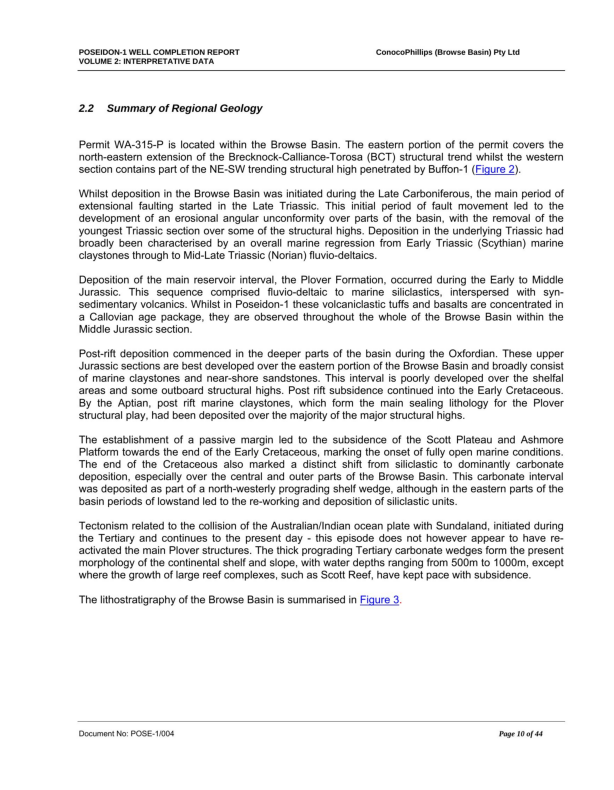



Report Name /content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 6 with Relevancy score 14.5625


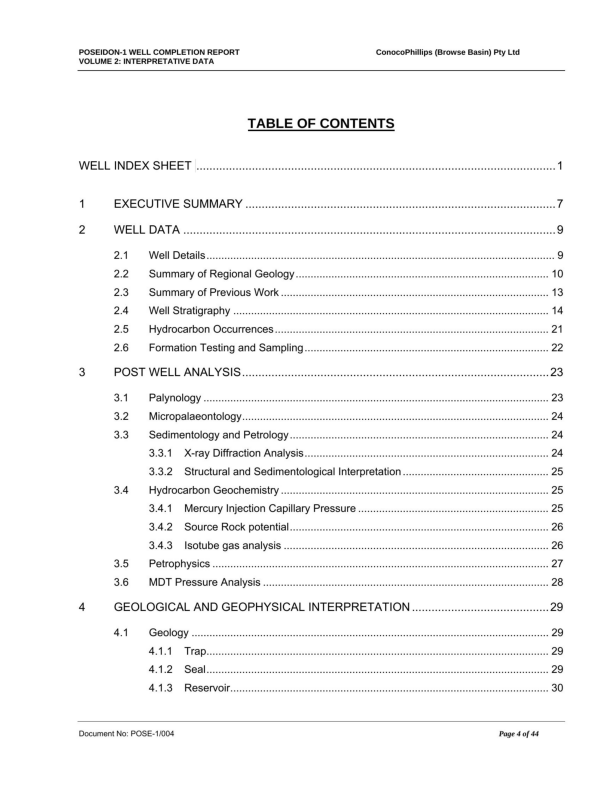



Report Name /content/data/poseidon 1/Poseidon1_BasicData_Appendix1_BiostratSampleSummary.pdf, Page 3 with Relevancy score 12.5625


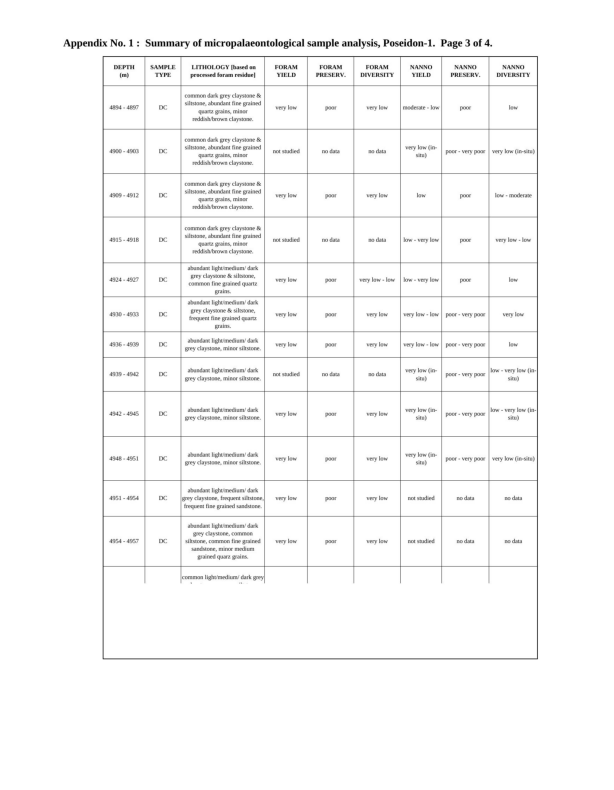

In [8]:
# Retrieve relevant pages from collection of reports
rag_folder.RAG('give me summary of regional geology', rag_models, k=3)

Report Name /content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 217 with Relevancy score 13.6875


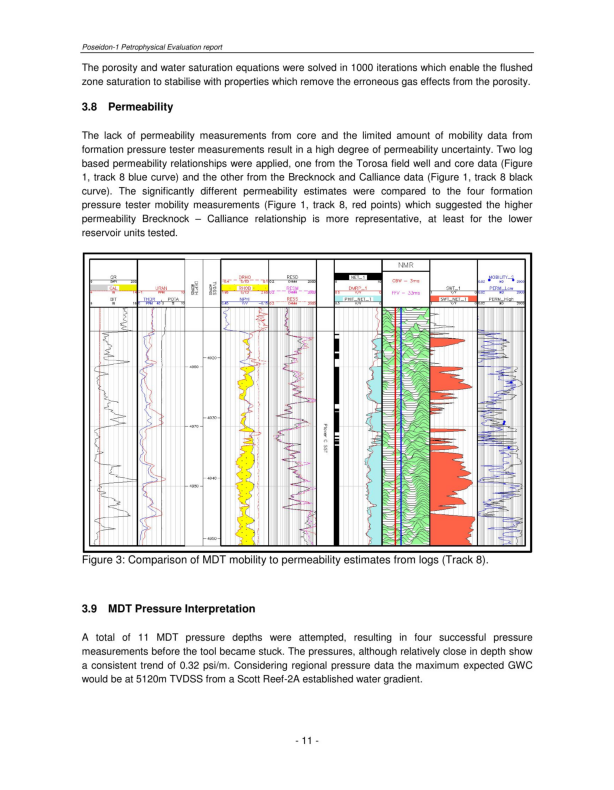



Report Name /content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 30 with Relevancy score 13.0


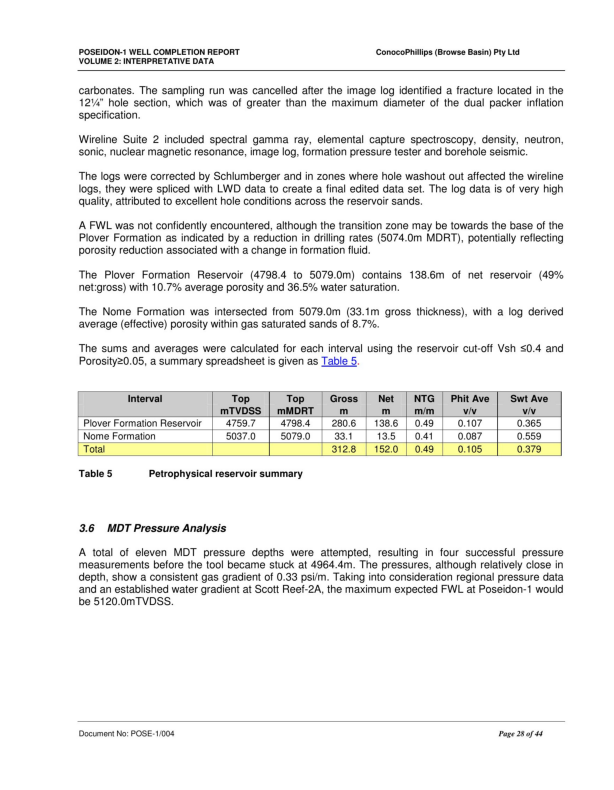



Report Name /content/data/poseidon 1/ConocoPhillips_Poseidon1_cmr_dmr_6inch_level_zero_report_client.pdf, Page 4 with Relevancy score 12.8125


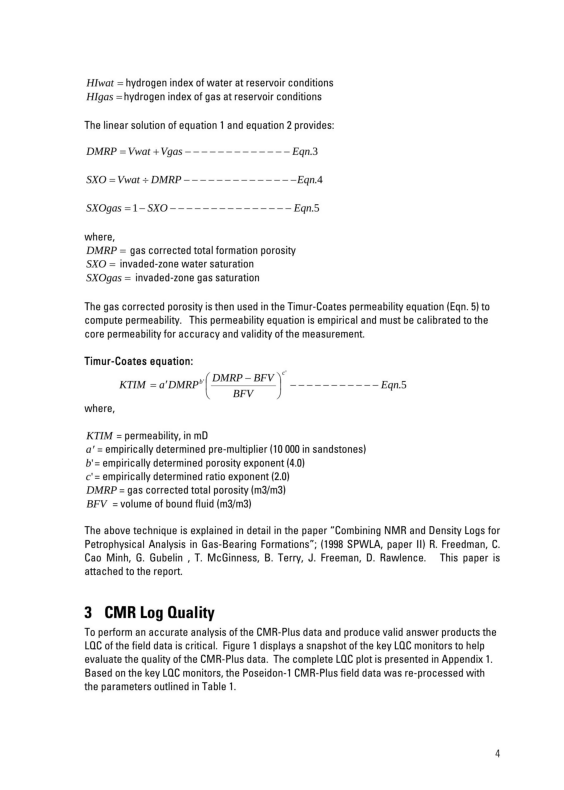

In [14]:
rag_folder.RAG('give me the porosity petrophysical measurement result from core', rag_models, k=3)


And you can ask the documents directly using `Ask` function

Note it will return list of 3 elements

1st element is the answer

2nd element is another list consist of file path of the relevant report, the page of that report, and similarity score

3rd element is a PIL object. You can use Matplotlib to display the page.

In [9]:
rag_folder.Ask('describe the regional geology in complete', rag_models)


(' The regional geology of the Browse Basin includes the Brecknock-Callianne-Torosa (BCT) structural trend, the NE-SW trending structural high penetrated by Buffon-1, and the deposition of the main reservoir interval, the Fluvio-deltaic to marine siliclastic, interspersed with syn-sedimentary volcanics.',
 ['/content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf',
  12,
  15.0],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200>)

In [11]:
rag_folder.Ask('when does the extensional faulting happen during deposition of Browne Basin', rag_models)


(' The extensional faulting started in the Late Triassic.',
 ['/content/data/poseidon 1/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf',
  12,
  16.875],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200>)